# Import des librairies

In [14]:
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.visualization import *

# Création des index dans le circuit quantiques pour les 4 joueurs, et les 4 raisonnements

In [15]:
ALICE = 0
BOB = 1
CHARLIE = 2
DAHLIA = 3
MY_REASONING = 4
BOB_REASONING = 5
CHARLIE_REASONING = 6
DAHLIA_REASONING = 7

# Création du circuit quantique de 8 qubits

In [16]:
circ = QuantumCircuit(8)

# Création d'une porte d'Hadammar par joueur, cela permet d'avoir toutes les combinaisons de teintue possible

In [17]:
circ.h(ALICE)
circ.h(BOB)
circ.h(CHARLIE)
circ.h(DAHLIA)
circ.barrier()

# Réponse d'Alice

In [18]:
circ.cx(BOB, MY_REASONING)
circ.cx(CHARLIE, MY_REASONING)
circ.cx(DAHLIA, MY_REASONING)
circ.barrier()

# Prise en compte de la réponse d'Alice par Bob, Charlie et Dahlia

In [19]:
circ.cx(MY_REASONING, BOB_REASONING)
circ.cx(MY_REASONING, CHARLIE_REASONING)
circ.cx(MY_REASONING, DAHLIA_REASONING)
circ.barrier()

# Réponses de Bob

In [20]:
circ.cx(CHARLIE, BOB_REASONING)
circ.cx(DAHLIA, BOB_REASONING)
circ.barrier()

# Prise en compte de la réponse de Bob par Charlie et Dahlia

In [21]:
circ.cx(BOB_REASONING, CHARLIE_REASONING)
circ.cx(BOB_REASONING, DAHLIA_REASONING)
circ.barrier()

# Réponse de Charlie

In [22]:
circ.cx(DAHLIA, CHARLIE_REASONING)
circ.barrier()

# Prise en compte de la réponse de Charlie par Dahlia

In [23]:
circ.cx(CHARLIE_REASONING, DAHLIA_REASONING)

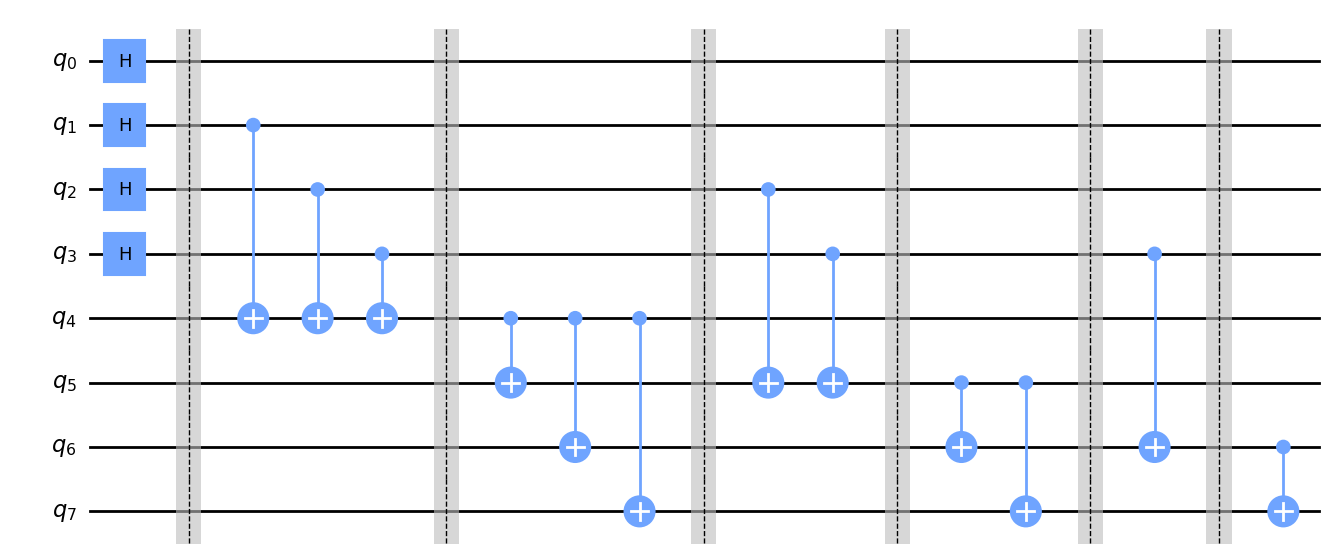

In [24]:
circ.draw('mpl')

# Mesure de tout les qubits

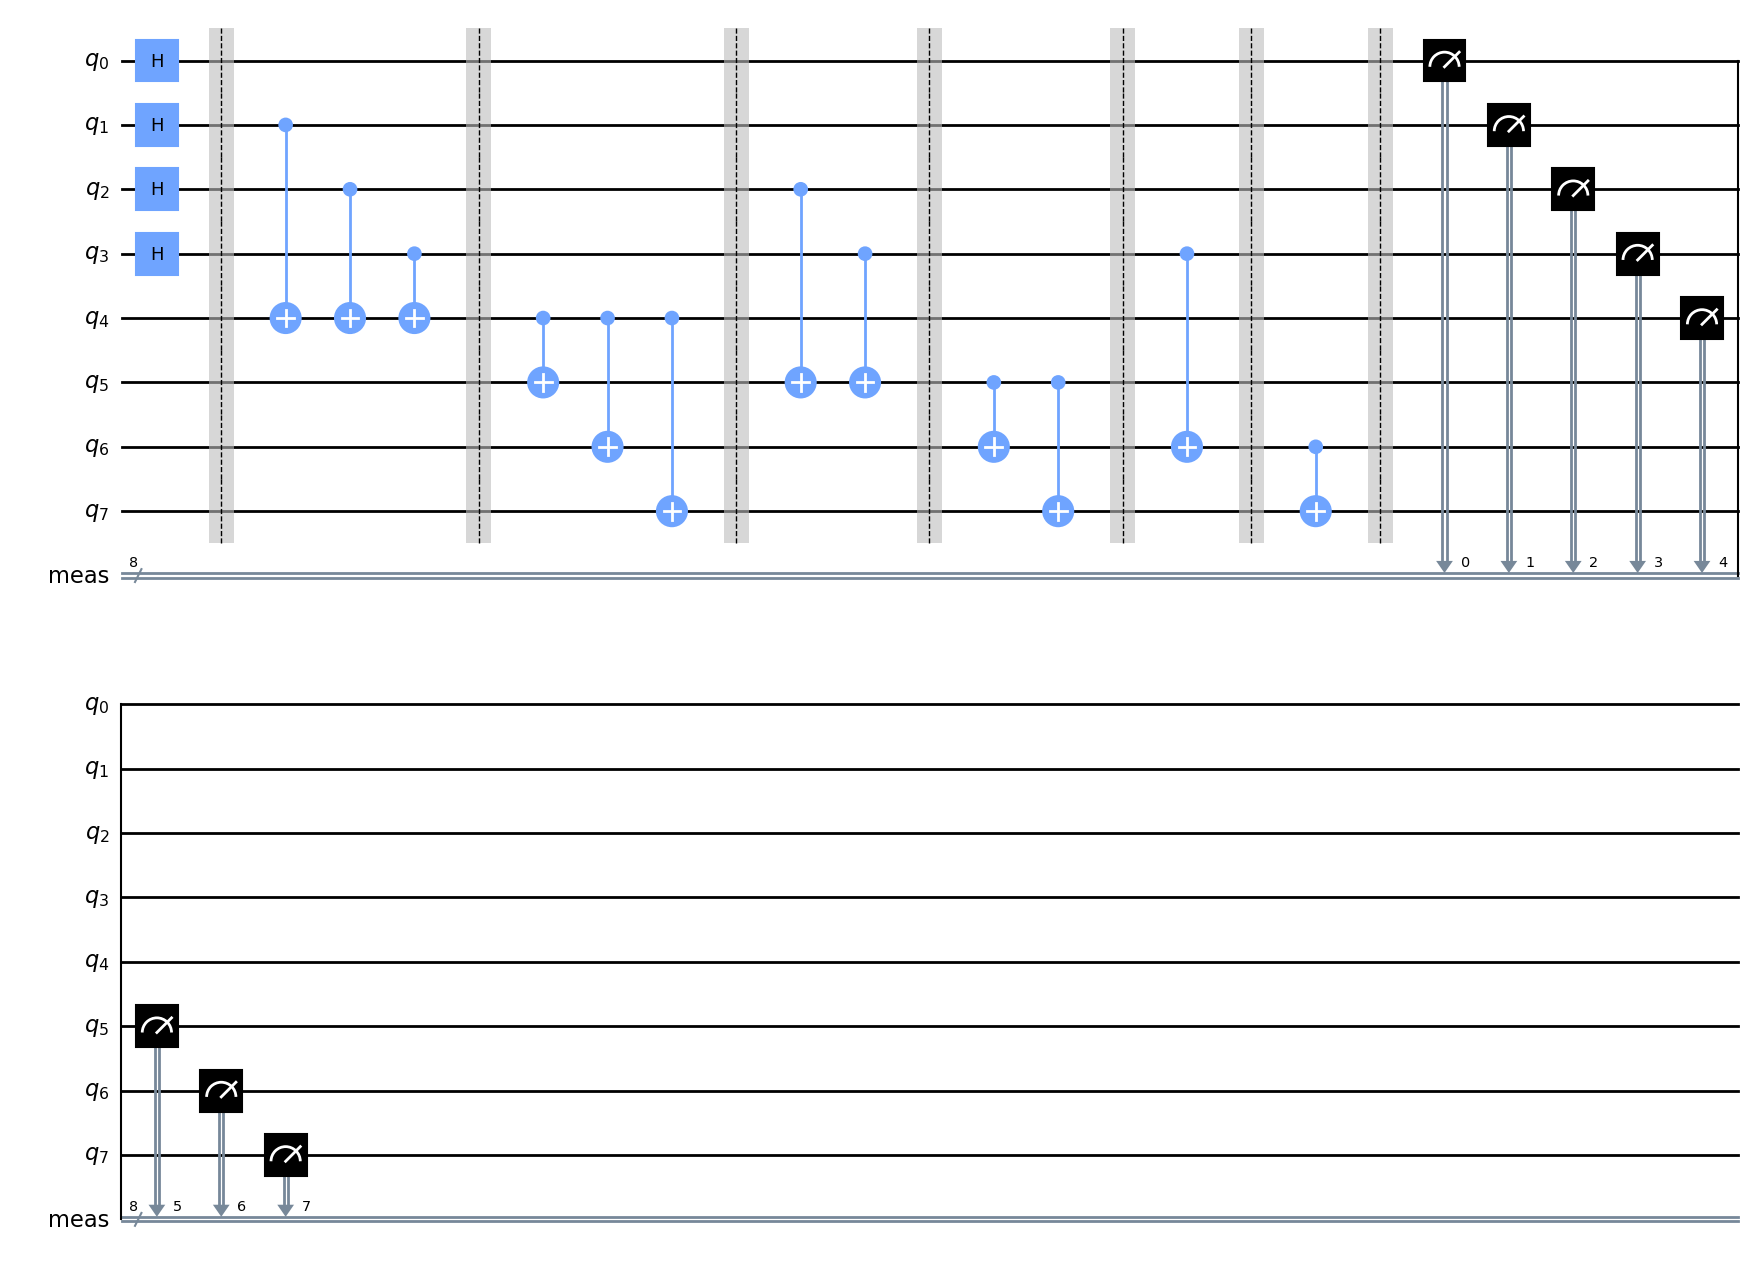

In [25]:
circ.measure_all()
circ.draw('mpl')

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector = result.get_statevector(circ,decimals=3)
plot_state_city(statevector) 